# * **InstaBot**  - Part 2*

#### In the following cell, I have 
1. Imported necessary libraries

In [10]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import numpy as np
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
import matplotlib.pyplot as plt 
import re

#### In the two following cells, I have
1. Connected to chrome webdriver object
2. stored instagram url in a variable 

In [11]:
driver = webdriver.Chrome(executable_path="D:\Softwares\Selenium\chromedriver")

In [12]:
url = 'https://www.instagram.com/'

#### In the following cell, I have
1. defined a function to go to the Instagram home page

In [13]:
def goHomeInsta():
    url = 'https://www.instagram.com/'
    driver.get(url)

In [14]:
goHomeInsta()

#### In the two following cells, I have
1. defined a function to login into Instagram
2. defined a function to logout of Instagram

In [15]:
def login(paraUsername, paraPassword):

    username = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='username'")))
    password = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='password'")))

    username.clear()
    password.clear()

    username.send_keys(paraUsername)
    password.send_keys(paraPassword)

    loginBtn = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type = 'submit']"))).click()

    saveLoginInfoNotNowBtn = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Not Now')]"))).click()
    notificationNotNowBtn = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Not Now')]"))).click()


    print("Login Successful")

In [16]:
def logout():
    time.sleep(2)
    profileUrl = f'https://www.instagram.com/{username}/'
    driver.get(profileUrl)
    
    profileIconBtn = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH,'//div[@class = "Fifk5"]/span'))).click()
    logoutBtn = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="react-root"]/section/nav/div[2]/div/div/div[3]/div/div[5]/div[2]/div[2]/div[2]/div[2]'))).click()
    
    print("Logout Successful")

#### Login

In [17]:
username = 'nikhstered'
password = 'identitytheftisnotajokejim'
login(username ,password)

Login Successful


## Task 1 : Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

1.2 Now Find the number of posts these handles have done in the previous 3 days.

1.3 Depict this information using a suitable graph.

### 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

#### In the following cell, I have
1. defined a function to get all the profiles shown as a search result for the specific search keyword 'food'

In [18]:
def getInstaHandles(keyword):

    searchInput = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH, '//input[@placeholder = "Search"]')))
    searchInput.clear()
    time.sleep(2)

    searchInput.send_keys(keyword)
    element = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, '//a[@class = "-qQT3"]')))
    handlesWebElements = driver.find_elements_by_xpath('//a[@class = "-qQT3"]')
    
    handles = []
    try:
        for i in handlesWebElements:
            soup = BeautifulSoup(i.get_attribute('outerHTML'),'html.parser')
            handle = soup.find(class_ = '_7UhW9').text
            if handle[0] != "#":
                handles.append(handle)
    except StaleElementReferenceException:
        print('Please check your keyword')
    return handles

#### In the following cell, I have
1. defined a function to open the specifed profile page 

In [19]:
def openProfile(handle):
    try:
        
        driver.get(url + handle)
    
    except NoSuchElementException:
        print('No Such Instagram Profile found')
        return False

#### In the following cell, I have
1. defined a function to <br>
    1.1 open a profile page using the above function( openProfile(handle)) <br>
    1.2 get the followers count of that page

In [20]:
def profileFollowersCount(handle):
    openProfile(handle)
    driver.refresh()
    WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH, "//span[@class = 'g47SY ']")))
    countOfFollowers = int(driver.find_elements_by_xpath("//span[@class = 'g47SY ']")[1].get_attribute('title').replace(',',''))
    #print(countOfFollowers)
    return countOfFollowers

#### In the following cell, I have
1. stored the keyword 'food'
2. created an empty list
3. iterated over the first 10 profiles having keyword <br>
    3.1 stored the followers count returned by the function(profileFollowersCount()) <br>
    3.2 appended this count to the list along with its handle

In [21]:
keyword = 'food'
foodProfilesAndFollowers = []

for ihandle in getInstaHandles(keyword)[0:10]:
    followers = profileFollowersCount(ihandle)
    foodProfilesAndFollowers.append([ihandle,followers])
foodProfilesAndFollowers

[['foodhunter_sabu', 361805],
 ['foodadikande', 5205],
 ['thispagewillmakeuhungry', 28039],
 ['eatlikeamaniac', 117555],
 ['kerala.food.diaries', 145906],
 ['rahulsfoodscenes', 35267],
 ['food', 126589],
 ['theindianfoodblogger', 127595],
 ['cochinfoodalert', 182023],
 ['salmanthefoodie', 136717]]

#### In the following cell, I have
1. created a pandas dataframe and appened the list into the dataframe
2. sorted it based on followers count in descending order and printed the top 5 rows

In [22]:
print(f"Top 5 amoung the first 10 profiles for the keyword '{keyword}' are :")
foodProfilesDF = pd.DataFrame(foodProfilesAndFollowers, columns=["Profile Name", "No of Followers"])
top5foodProfilesDF = foodProfilesDF.sort_values(by=['No of Followers'],ascending=False,ignore_index=True)[0:5]
top5foodProfilesDF

Top 5 amoung the first 10 profiles for the keyword 'food' are :


,Profile Name,No of Followers
0,foodhunter_sabu,361805
1,cochinfoodalert,182023
2,kerala.food.diaries,145906
3,salmanthefoodie,136717
4,theindianfoodblogger,127595


#### In the following cell, I have
1. plotted the above data into a pie chart

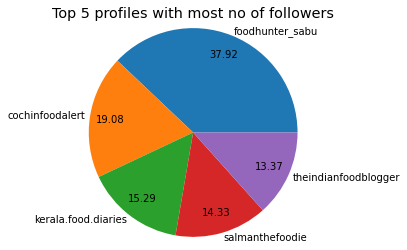

In [23]:
plt.pie(top5foodProfilesDF['No of Followers'],labels=top5foodProfilesDF['Profile Name'],labeldistance= 1.05, radius=1.2,autopct="%.2f",pctdistance=.8)
plt.style.use("ggplot")
plt.title("Top 5 profiles with most no of followers")
plt.show()

### 1.2 Now Find the number of posts these handles have done in the previous 3 days.

#### In the following cell, I have
1. defined a function to retrive the count of total posts by each of the top 5 profiles posted in the past 3 days

In [24]:
def postsCountForNDays(handle, noOfDaysConsidered):
    openProfile(handle)
    driver.refresh()
    time.sleep(1)

    WebDriverWait(driver,30).until(EC.element_to_be_clickable((By.CLASS_NAME, 'kIKUG'))).click()
    count = 0
    while True:
        time.sleep(1)
        WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
        timeData = driver.find_element_by_xpath('//time[contains(@class, "Nzb55")]').get_attribute('innerHTML')

        if timeData[-1] in ["h","s","m"]:
            count+=1
        elif timeData[-1] in ["d"] and int(timeData[:-1]) <= 3 :
            count+=1
        else:
            break 

        try:
            nextPost = driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            nextPost.click()
        except:
            break
    print(f"{handle} has {count} post(s) in past 3 days") 
    return handle, count


#### In the following cell, I have
1. created an empty list
2. initialed a variable with the number of days to be considered (here 3, as per question)
3. iterated over the top 5 profiles <br>
    3.1 called the above function(postsCountForNDays) to retrive number of posts by each users <br>
    3.2 appended to the list

In [25]:
foodProfilesAndPostsCount = []
noOfDaysConsidered = 3
for index , row in top5foodProfilesDF.iterrows():
    handle, count = postsCountForNDays(row['Profile Name'],noOfDaysConsidered)
    foodProfilesAndPostsCount.append([handle, count])

foodhunter_sabu has 2 post(s) in past 3 days
cochinfoodalert has 0 post(s) in past 3 days
kerala.food.diaries has 1 post(s) in past 3 days
salmanthefoodie has 2 post(s) in past 3 days
theindianfoodblogger has 1 post(s) in past 3 days


#### In the following cell, I have
1. stored the above list as a pandas dataframe

In [26]:
postsIn3DaysDF = pd.DataFrame(foodProfilesAndPostsCount, columns = ['Profile Name','Number of posts in past 3 days'])
postsIn3DaysDF

,Profile Name,Number of posts in past 3 days
0,foodhunter_sabu,2
1,cochinfoodalert,0
2,kerala.food.diaries,1
3,salmanthefoodie,2
4,theindianfoodblogger,1


### 1.3 Depict this information using a suitable graph.

#### In the following cell, I have
1. plotted a bar graph and a pie chart with the above data

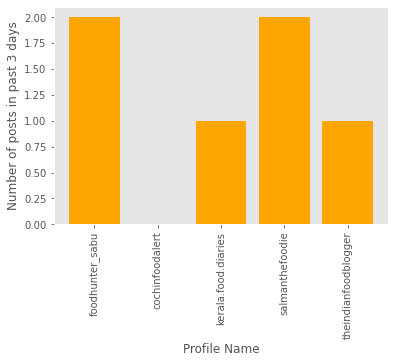

In [27]:
plt.bar(postsIn3DaysDF['Profile Name'],postsIn3DaysDF['Number of posts in past 3 days'],color = 'orange')
plt.xlabel('Profile Name')
plt.ylabel('Number of posts in past 3 days')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

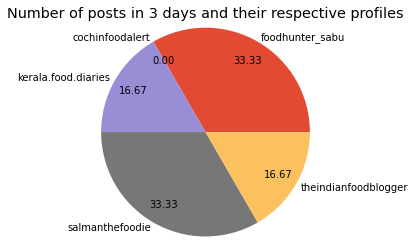

In [28]:
plt.pie(postsIn3DaysDF['Number of posts in past 3 days'],labels=postsIn3DaysDF['Profile Name'],labeldistance= 1.05, radius=1.2,autopct="%.2f",pctdistance=.8)
plt.style.use("ggplot")
plt.title("Number of posts in 3 days and their respective profiles")
plt.show()

## Task 2 : Your friend also needs a list of hashtags that he should use in his posts.
2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

2.3 Create a csv file with two columns : the word and its frequency

2.4 Now, find the hashtags that were most popular among these bloggers

2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

### 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

#### In the following cell, I have
1. defined a function to get the captions of a profile. <br>
    1.1 number of posts to consider for retriving the captions are given as an arguement

In [29]:
def postScraper(handle, noOfPostsConsidered):
    openProfile(handle)
    driver.refresh()
    time.sleep(1)
    postNum = 1
    WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.CLASS_NAME, 'kIKUG'))).click()
    funcpostsAndCaptionList = []
    
    while postNum <= noOfPostsConsidered:
        time.sleep(1)
        WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]/span')))
        captionData = driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span').text
        print(f"{handle}'s Post {postNum} scrapped. ") 
        funcpostsAndCaptionList.append([handle, postNum, captionData])
        try:
            nextPost = driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            nextPost.click()
            postNum+=1
        except:
            break
    return funcpostsAndCaptionList


#### In the two following cell, I have
1. given the value for number of posts to be considered,n
2. created an empty list 1
3. iterated over the top 5 profiles <br>
    3.1 stored the n captions for that profile in a list 2 <br>
    3.2 iterated over this list 2 elements one by one and appended them to list 1
4. went back to home page of instagram
5. stored this list 1 data to a pandas dataframe

In [30]:
noOfPostsConsidered = 10
postsAndCaptionsList = []
for index , row in top5foodProfilesDF.iterrows():
    funcpostsAndCaptionList = postScraper(row['Profile Name'], noOfPostsConsidered)
    for i in funcpostsAndCaptionList:
        postsAndCaptionsList.append(i)
    print("***********************************************************")
goHomeInsta()   

foodhunter_sabu's Post 1 scrapped. 
foodhunter_sabu's Post 2 scrapped. 
foodhunter_sabu's Post 3 scrapped. 
foodhunter_sabu's Post 4 scrapped. 
foodhunter_sabu's Post 5 scrapped. 
foodhunter_sabu's Post 6 scrapped. 
foodhunter_sabu's Post 7 scrapped. 
foodhunter_sabu's Post 8 scrapped. 
foodhunter_sabu's Post 9 scrapped. 
foodhunter_sabu's Post 10 scrapped. 
***********************************************************
cochinfoodalert's Post 1 scrapped. 
cochinfoodalert's Post 2 scrapped. 
cochinfoodalert's Post 3 scrapped. 
cochinfoodalert's Post 4 scrapped. 
cochinfoodalert's Post 5 scrapped. 
cochinfoodalert's Post 6 scrapped. 
cochinfoodalert's Post 7 scrapped. 
cochinfoodalert's Post 8 scrapped. 
cochinfoodalert's Post 9 scrapped. 
cochinfoodalert's Post 10 scrapped. 
***********************************************************
kerala.food.diaries's Post 1 scrapped. 
kerala.food.diaries's Post 2 scrapped. 
kerala.food.diaries's Post 3 scrapped. 
kerala.food.diaries's Post 4 scrapped.

In [31]:
postCaptionsDF = pd.DataFrame(postsAndCaptionsList, columns = ['Profile Name','Post Number', 'Post Caption'])
postCaptionsDF.head(50)

,Profile Name,Post Number,Post Caption
0,foodhunter_sabu,1,"Kozhi Nirachathu by @ummi.vabdulla\n\nAlso, lo..."
1,foodhunter_sabu,2,Afghan Chicken using @cremberieofficial yoghur...
2,foodhunter_sabu,3,Kochi Style Erachi Choru\nThank you @salmanthe...
3,foodhunter_sabu,4,"@joju_george പറഞ്ഞ Cashew , kismis ഒക്കെ ഇട്ട്..."
4,foodhunter_sabu,5,Binnammas Special Beef Stew\nThank you @ashlya...
5,foodhunter_sabu,6,"Aslam Butter Chicken, Thank you @meera.ramkuma..."
6,foodhunter_sabu,7,@malabartearoom Prawns Moilee\n\n#foodblogger ...
7,foodhunter_sabu,8,@maya_yummyoyummy White Karahi Chicken\n\nIngr...
8,foodhunter_sabu,9,Schezwan Chicken\n\n#foodfeed #foodography #fo...
9,foodhunter_sabu,10,@lekshminair20 's നാടൻ പെപ്പർ ചിക്കൻ\n\nIngred...


### 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

#### In the following cell, I have
1. defined a function to check if a word is valid or not 

In [32]:
def isAllowedSpecificWord(word):
    charRe = re.compile(r'[^a-zA-Z0-9.]')
    word = charRe.search(word)
    return not bool(word)

#### In the three following cells, I have
1. iterated over every row of captions and then iterated over every valid word in each row <br>
    1.1 if valid the word is added to the dictionary and its count is updated
2. stored the above dictionary to a pandas dataframe
3. sorted the dataframe in the decending order of frequency.

In [33]:
wordFreq = dict()
for index , row in postCaptionsDF.iterrows():
    for word in row['Post Caption'].split():
        if isAllowedSpecificWord(word):
            if word in wordFreq:
                wordFreq[word] += 1
            else:
                wordFreq[word] = 1
#print(wordFreq)

In [34]:
wordFreqDF = pd.DataFrame([{"Word":k, "Frequency":v} for k, v in wordFreq.items()])
wordFreqDF

,Word,Frequency
0,Kozhi,2
1,Nirachathu,1
2,by,6
3,look,1
4,what,1
...,...,...
694,slices,1
695,ml,1
696,vinegar,1
697,Dates,1


In [35]:
wordFreqDF = wordFreqDF.sort_values(by=['Frequency'],ascending=False,ignore_index=True)
wordFreqDF.head(20)

,Word,Frequency
0,.,118
1,and,44
2,the,39
3,Follow,30
4,a,19
5,to,18
6,of,17
7,1,17
8,is,15
9,from,14


### 2.3 Create a csv file with two columns : the word and its frequency

#### In the following cell, I have
1. stored the above data in dataframe to a csv file

In [36]:
wordFreqDF.to_csv('Word Frequency in food blogs.csv',index=False)
wordFreqDF.head(5)

,Word,Frequency
0,.,118
1,and,44
2,the,39
3,Follow,30
4,a,19


### 2.4 Now, find the hashtags that were most popular among these bloggers

#### In the three following cell, I have
1. created an empty dictionary
2. iterated over every row of postCaptions and then iterated over every valid word in each row <br>
    2.1 if the word begins with an '#' , added the word to dictionary and updated its count
3. stored the above dictionary to a pandas dataframe
4. sorted the dataframe in the decending order of frequency.

In [37]:
hashTagFreq =dict()
for index , row in postCaptionsDF.iterrows():
    for word in row['Post Caption'].split():
        if word[0] == '#':
            if word in hashTagFreq:
                hashTagFreq[word] += 1
            else:
                hashTagFreq[word] = 1
#print(hashTagFreq)

In [38]:
hashTagFreqDF = pd.DataFrame([{"#Tag":k, "Frequency":v} for k, v in hashTagFreq.items()])
hashTagFreqDF

,#Tag,Frequency
0,#foodtrucks,1
1,#foodvlogger,1
2,#foodlifestyle,1
3,#foodloversindia,1
4,#foodlicious,1
...,...,...
453,#dubailifestyle,10
454,#quarantinefood,10
455,#bangalorediaries,10
456,#bangalorebloggers,10


In [39]:
hashTagFreqDF = hashTagFreqDF.sort_values(by=['Frequency'],ascending=False,ignore_index=True)
hashTagFreqDF.head(10)

,#Tag,Frequency
0,#theindianfoodbloggers,30
1,#foodie,29
2,#kerala,25
3,#foodgasm,20
4,#foodstagram,20
5,#instagood,20
6,#kochi,20
7,#instafood,18
8,#foodporn,18
9,#food,17


### 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

#### In the following two cells, I have
1. updated the dataframe with only the top 5 most frequent hashtags
2. plotted a pie chart for the above data

In [40]:
hashTagFreqDF = hashTagFreqDF[0:5]
hashTagFreqDF.head()

,#Tag,Frequency
0,#theindianfoodbloggers,30
1,#foodie,29
2,#kerala,25
3,#foodgasm,20
4,#foodstagram,20


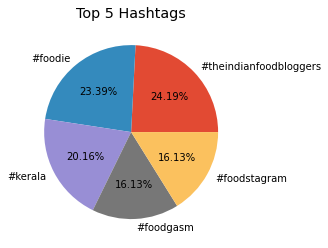

In [41]:
plt.pie(hashTagFreqDF['Frequency'],labels = hashTagFreqDF['#Tag'],autopct="%.2f%%")
plt.title('Top 5 Hashtags')
plt.style.use("ggplot")
plt.show()

## Task 3 : You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:

3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

3.2 Calculate the average likes for a handle.

3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

3.4 Create a bar graph to depict the above obtained information.

### 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

#### In the following cell, I have 
1. defined a function to scrape likes of n posts of a profile <br>
*PS : I have skipped the post if its an **IGTV** video *

In [42]:
def likeScraper(handle, noOfPostsConsidered):
    openProfile(handle)
    driver.refresh()
    time.sleep(1)
    postNum = 0
    WebDriverWait(driver,30).until(EC.element_to_be_clickable((By.CLASS_NAME, 'kIKUG'))).click()
    postLikes = []
    
    while True:
        driver.implicitly_wait(5)
        try:
            likeData=driver.find_element_by_xpath('//a[contains(@class,"zV_Nj")]/span')
            if(len(likeData.text)>=1):
                postNum += 1
                likes = likeData.text.replace(',','')
                print(f'{handle}\'s post {postNum} has {likes} likes. ')
                likes = int(likes)
                postLikes.append([handle, postNum, likes])
            if postNum == noOfPostsConsidered:
                break
        except:
            if postNum == noOfPostsConsidered:
                break
            else:
                try:
                    next1 = driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
                    next1.click()
                except:
                    break

        if postNum == noOfPostsConsidered:
            break
        try:
            next1 = driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next1.click()
        except:
            break

    return postLikes            

#### In the following two cell, I have
1. stored the value for number of posts to be considered
2. created an empty list 1
3. iterated over the top 5 profiles <br>
    3.1 called the function (likeScraper)and stored the result in a list 2 <br>
    3.2 iterated over list 2 and appended each element to list 1
4. went back to instagram home page
5. stored this list 1 into a pandas dataframe

In [43]:
noOfPostsConsidered = 10
postsAndLikesList = []
for index , row in top5foodProfilesDF.iterrows():
    funcpostsAndLikesList = likeScraper(row['Profile Name'], noOfPostsConsidered)
    for i in funcpostsAndLikesList:
        postsAndLikesList.append(i)
    print("***********************************************************")
goHomeInsta()   

foodhunter_sabu's post 1 has 25448 likes. 
foodhunter_sabu's post 2 has 19175 likes. 
foodhunter_sabu's post 3 has 27453 likes. 
foodhunter_sabu's post 4 has 26438 likes. 
foodhunter_sabu's post 5 has 14764 likes. 
foodhunter_sabu's post 6 has 25183 likes. 
foodhunter_sabu's post 7 has 112868 likes. 
foodhunter_sabu's post 8 has 17627 likes. 
foodhunter_sabu's post 9 has 6060 likes. 
foodhunter_sabu's post 10 has 20469 likes. 
***********************************************************
cochinfoodalert's post 1 has 5511 likes. 
cochinfoodalert's post 2 has 5249 likes. 
cochinfoodalert's post 3 has 20593 likes. 
cochinfoodalert's post 4 has 20249 likes. 
cochinfoodalert's post 5 has 12501 likes. 
cochinfoodalert's post 6 has 27689 likes. 
cochinfoodalert's post 7 has 26546 likes. 
cochinfoodalert's post 8 has 26474 likes. 
cochinfoodalert's post 9 has 1694 likes. 
cochinfoodalert's post 10 has 28661 likes. 
***********************************************************
kerala.food.diaries's

In [44]:
postsAndLikesDF = pd.DataFrame(postsAndLikesList, columns=['Profile Name','Post No.','Likes'])
postsAndLikesDF

,Profile Name,Post No.,Likes
0,foodhunter_sabu,1,25448
1,foodhunter_sabu,2,19175
2,foodhunter_sabu,3,27453
3,foodhunter_sabu,4,26438
4,foodhunter_sabu,5,14764
5,foodhunter_sabu,6,25183
6,foodhunter_sabu,7,112868
7,foodhunter_sabu,8,17627
8,foodhunter_sabu,9,6060
9,foodhunter_sabu,10,20469


### 3.2 Calculate the average likes for a handle.

#### In the following two cells, I have
1. grouped the dataframe by profile name and found mean
2. stored above result into a new dataframe

In [45]:
dfAvgLikes = postsAndLikesDF.groupby(['Profile Name']).Likes.agg('mean').to_frame('Avg Likes').reset_index()
dfAvgLikes

,Profile Name,Avg Likes
0,cochinfoodalert,17516.7
1,foodhunter_sabu,29548.5
2,kerala.food.diaries,14034.4
3,salmanthefoodie,13614.6
4,theindianfoodblogger,4955.3


### 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

#### In the following cell, I have 
1. merged 2 dataframes (top5foodProfilesDF, dfAvgLikes) on profile name 
2. stored it into a new pandas dataframe df1
3. created a new column with value ( avg likes / number of followers)

In [46]:
df1 = pd.merge(top5foodProfilesDF, dfAvgLikes, on='Profile Name')
df1['Avg followers:like ratio'] = df1['Avg Likes'] / df1['No of Followers']
df1

,Profile Name,No of Followers,Avg Likes,Avg followers:like ratio
0,foodhunter_sabu,361805,29548.5,0.081670
1,cochinfoodalert,182023,17516.7,0.096233
2,kerala.food.diaries,145906,14034.4,0.096188
3,salmanthefoodie,136717,13614.6,0.099582
4,theindianfoodblogger,127595,4955.3,0.038836


### 3.4 Create a bar graph to depict the above obtained information.

#### In the following two cell, I have
1. plotted a bar graph and a pie chart with above dataframe df1

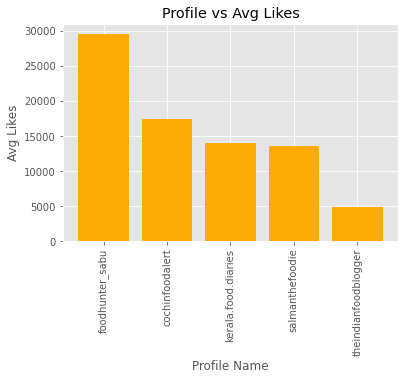

In [47]:
plt.bar(df1['Profile Name'],df1['Avg Likes'],color = '#fcab08')
plt.xticks(rotation = 90)
plt.xlabel('Profile Name')
plt.ylabel('Avg Likes')
plt.title('Profile vs Avg Likes')
plt.show()


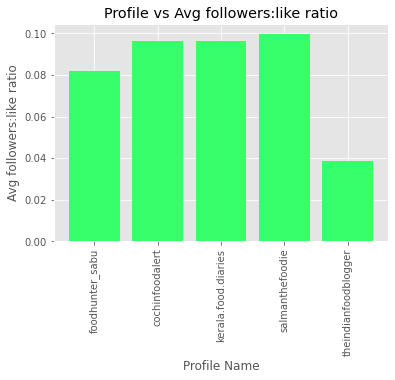

In [48]:
plt.bar(df1['Profile Name'],df1['Avg followers:like ratio'],color = '#36ff6b')
plt.xticks(rotation = 90)
plt.xlabel('Profile Name')
plt.ylabel('Avg followers:like ratio')
plt.title('Profile vs Avg followers:like ratio')
plt.show()